# **Verify your templates**

In [1]:
''' Verify your Markdown templates at once and 
    remove all the error from the  mentioned lines below''' 

from utils.Scrapper import Data_Generate
f=open('Markdown/Markdown_English.txt','r')
%time result=Data_Generate(f,random1=0,repeat1=1,verify=0)


Wall time: 19.5 ms


# **EDA**

Wall time: 670 ms


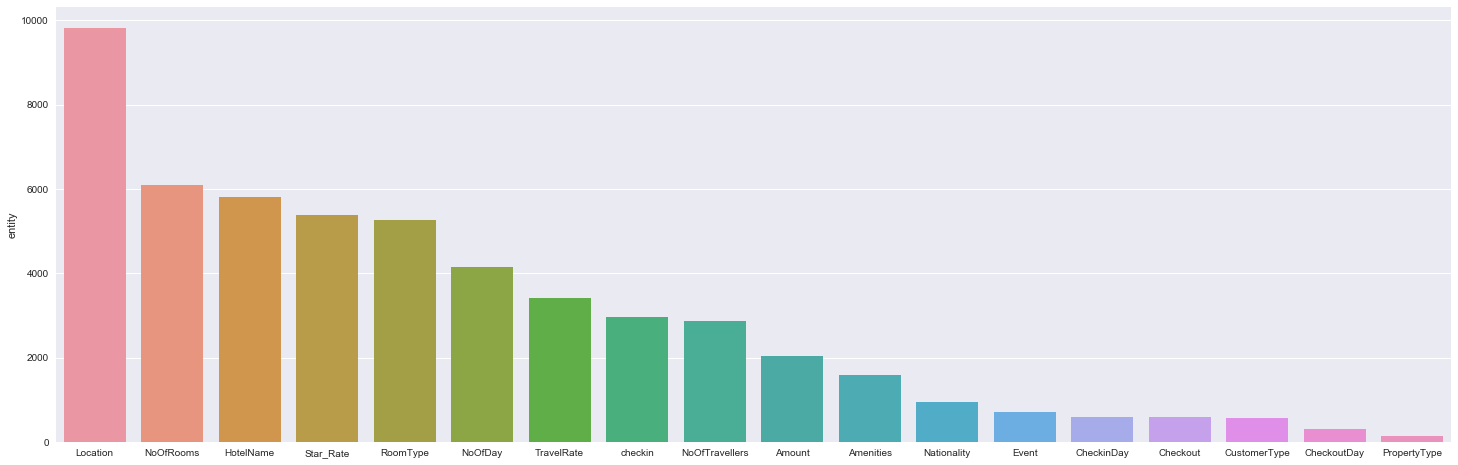

In [10]:
''' Check whether your dataset is balanced 

   Random = 1 will get you randomized values 
   any other values of Random will generate Sequencial values

   Repeat will enable Repeatation of a particular templates with different values

   Verify = 1 will system exit your code in case your templates have any error
   Verify = 0 will avoid script failure and skip that particular template
   
   '''

from utils.Scrapper import final_script
f=open('Markdown/Markdown_English.txt','r')
%time result,list_entity,list_intent_final=final_script(f,random1=0,repeat=15,verify=1)
import pandas as pd
df=pd.DataFrame()
df['entity']=list_entity
df['entity'].value_counts()
import seaborn
seaborn.set(rc={'figure.figsize':(25,8)})
seaborn.barplot(x=df.entity.value_counts().index, y=df.entity.value_counts())


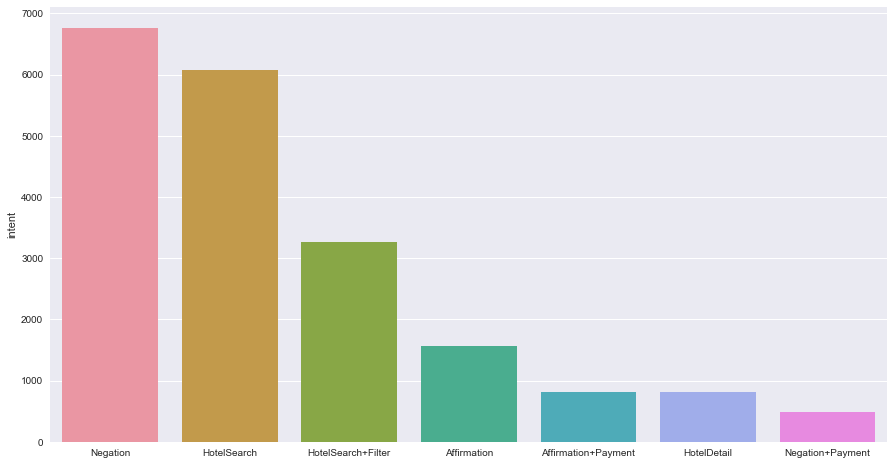

In [3]:
import pandas as pd
df=pd.DataFrame()
df['intent']=list_intent_final
df['intent'].value_counts()
import seaborn
seaborn.set(rc={'figure.figsize':(15,8)})
seaborn.barplot(x=df.intent.value_counts().index, y=df.intent.value_counts())


# **Generate the json file**

In [4]:
print('The total sentences generated from the Markdown templates are',len(result))

The total sentences generated from the Markdown templates are 19775


In [5]:
from utils.Scrapper import entity_fetcher
final_dict={}
final_dict['Hotel_Dataset']=result
f=open('Markdown/Markdown_English.txt','r')
data=entity_fetcher(f)
final_dict['lookups']=data


In [6]:
import json
json_object = json.dumps(final_dict, indent = 4) 
with open("Json_hotel/Hotel.json", "w") as outfile: 
     outfile.write(json_object) 

# Data Processing

In [7]:
with open('Json_hotel/Hotel.json') as f:
  data = json.load(f)

In [8]:
from utils.Data_Processor import data_Processer
df_old,df_new,list3=data_Processer(data)

In [9]:
df_old.to_csv('Generated/English_Ner_dataset_CRF.csv')

df_new.to_csv('Generated/NER_Dataset_Hotel_Bi-LSTM.csv')

import pickle
with open('Generated/English_NER_Hotel_list_CRF', 'wb') as f:
  pickle.dump(list3, f)